# Импорт

https://colab.research.google.com/drive/1nbjfRvIN1ganmpa5FcsWV6BQfhjKTEPE?usp=sharing#scrollTo=PeWNrMvmRVjG

In [28]:
from sklearn.metrics import *
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from Classes.BagOfWords import BagOfWords, ExtendAbleBagOfWords
from Classes.KNumNeighborsClassifier import KNumNeighborsClassifier
from Classes.KNumNeighborsTeacher import KNumNeighborsTeacher
from Classes.KMeanClastinatorTrain import KMeanClastinatorTrain
from Functions.functions_of_priority import max_count_class
from Functions.distance_functions import euclid_distance
from Classes.PCA import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import choice
from scipy.linalg import eigh
import pandas as pd
import spacy
import re
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def clastering_classification_result(yt, yp):
    print('Accuracy')
    print(accuracy_score(yt, yp))
    print(accuracy_score(abs(yt-1), yp))
    print('Confusion matrix')
    print(confusion_matrix(yt, yp))
    print(confusion_matrix(abs(yt-1), yp))
    print('Precision, Recall, F\n', classification_report(yt, yp))
    print('Precision, Recall, F\n', classification_report(abs(yt-1), yp))
    fpr, tpr, thresholds = roc_curve(yp, yt)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    display.plot()
    fpr, tpr, thresholds = roc_curve(abs(yt-1), yp)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    display.plot()


# Test text

In [2]:
train_texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
               "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию"]
test_texts = ["В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]


In [3]:
bag = np.array([])
for text in train_texts:
    bag = np.append(bag, np.array(re.sub(r'[^\w\s]', '', text).split(' ')))
bag = np.unique(bag)
bag

array(['Великолепный', 'Пожалуй', 'будни', 'бы', 'ему', 'если', 'и',
       'который', 'легкой', 'любых', 'написал', 'нервы', 'пару', 'первые',
       'положительную', 'поможет', 'посмотрел', 'при', 'просто',
       'рецензию', 'руки', 'с', 'сезонов', 'сериал', 'сериала', 'серые',
       'скрасит', 'стрессах', 'только', 'успокоить', 'этого', 'я'],
      dtype='<U32')

In [4]:
test_words = np.array([])
for text in test_texts:
    test_words = np.append(test_words, np.array(re.sub(r'[^\w\s]', '', text).split(' ')))
test_words


array(['В', 'общем', 'если', 'создатели', 'этого', 'сериала', 'не',
       'вернут', 'всё', 'на', 'круги', 'своя', 'то', 'рейтинги',
       'следующих', 'сезонов', 'будут', 'становится', 'все', 'ниже', 'и',
       'ниже', 'а', 'зрительская', 'аудитория', 'будет', 'все', 'меньше',
       'и', 'меньше'], dtype='<U32')

# ExtendAbleBagOfWords Test

In [5]:
eabow = ExtendAbleBagOfWords(bag=bag, vector_size=5, uncknow_word_indicator=-2)

In [6]:
eabow.vectorize(test_words)


array([-2., -2.,  5., -2., 30., 24., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., 22., -2., -2., -2., -2.,  6., -2., -2., -2., -2., -2.,
       -2., -2.,  6., -2.])

In [7]:
print(bag)

['Великолепный' 'Пожалуй' 'будни' 'бы' 'ему' 'если' 'и' 'который' 'легкой'
 'любых' 'написал' 'нервы' 'пару' 'первые' 'положительную' 'поможет'
 'посмотрел' 'при' 'просто' 'рецензию' 'руки' 'с' 'сезонов' 'сериал'
 'сериала' 'серые' 'скрасит' 'стрессах' 'только' 'успокоить' 'этого' 'я']


In [8]:
test_words = np.array([])
for text in test_texts:
    test_words = np.append(test_words, np.array(re.sub(r'[^\w\s]', '', text).split(' ')))
test_words


array(['В', 'общем', 'если', 'создатели', 'этого', 'сериала', 'не',
       'вернут', 'всё', 'на', 'круги', 'своя', 'то', 'рейтинги',
       'следующих', 'сезонов', 'будут', 'становится', 'все', 'ниже', 'и',
       'ниже', 'а', 'зрительская', 'аудитория', 'будет', 'все', 'меньше',
       'и', 'меньше'], dtype='<U32')

# BagOfWords

In [9]:
bow = BagOfWords(bag=bag)

In [10]:
bow.vectorize(test_words)


[] В [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
else
[] общем [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1.]
else
[5] если [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[] создатели [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
else
[30] этого [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 

array([[0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        1., 1., 1., 1., 2.]])

# Load data

In [11]:
stops = set(stopwords.words('english'))


In [12]:
df = pd.read_csv('../Data/DataLaba8/spam.csv', encoding='windows-1252').iloc[:, :2]
df.columns = ['spam', 'message']
equivalations_is_spam = pd.factorize(df['spam'])
df['spam'] = equivalations_is_spam[0]
df

spam                                            message
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567     1  This is the 2nd time we have tried 2 contact u...
5568     0              Will Ì_ b going to esplanade fr home?
5569     0  Pity, * was in mood for that. So...any other s...
5570     0  The guy did some bitching but I acted like i'd...
5571     0                         Rofl. Its true to its name

[5572 rows x 2 columns]

# Data preprocessing

In [13]:
df['message'] = df['message'].map(lambda text: np.array([word for word in re.sub(r'[^\w\s]', '', text.lower()).split() if word not in stops]))
df

spam                                            message
0        0  [go, jurong, point, crazy, available, bugis, n...
1        0                     [ok, lar, joking, wif, u, oni]
2        1  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        0      [u, dun, say, early, hor, u, c, already, say]
4        0  [nah, dont, think, goes, usf, lives, around, t...
...    ...                                                ...
5567     1  [2nd, time, tried, 2, contact, u, u, å750, pou...
5568     0                [ì_, b, going, esplanade, fr, home]
5569     0                   [pity, mood, soany, suggestions]
5570     0  [guy, bitching, acted, like, id, interested, b...
5571     0                                 [rofl, true, name]

[5572 rows x 2 columns]

In [14]:
max_line = df['message'].map(len).max()
max_line


80

# ExtendAbleBagOfWords

In [15]:
big_bag = np.array([])
for text in df['message']:
    big_bag = np.append(big_bag, np.array([text]))
big_bag = np.unique(big_bag)
big_bag

array(['0', '008704050406', '0089my', ..., 'ûï', 'ûïharry', 'ûò'],
      dtype='<U51')

In [16]:
EABoW = ExtendAbleBagOfWords(bag=big_bag, vector_size=max_line, uncknow_word_indicator=-2)
vectors = df['message'].map(lambda text: EABoW.vectorize(text))


In [17]:
eabow_vectors = np.append(vectors[0].reshape(1, vectors[0].shape[0]), np.ones([1, max_line - vectors[0].shape[0]]))
eabow_vectors = eabow_vectors.reshape(1, eabow_vectors.shape[0])
for vector in vectors[1:]:
    # print(vector.shape, np.append(vector, - np.ones(1, max_line - vector.shape[0])).shape, vector.tolist())
    # print(eabow_vectors.shape, eabow_vectors.tolist())
    # print(np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]])).shape)
    v = np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]]))
    eabow_vectors = np.append(eabow_vectors, v.reshape(1, v.shape[0]), axis=0)
eabow_vectors


array([[ 3.750e+03,  4.646e+03,  6.378e+03, ...,  1.000e+00,  1.000e+00,
         1.000e+00],
       [ 5.942e+03,  4.844e+03,  4.614e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.541e+03,  3.125e+03,  4.150e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 6.304e+03,  5.518e+03,  7.546e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.908e+03,  1.626e+03,  9.640e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.995e+03,  8.467e+03,  5.639e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [18]:
eabow_vectors_norm = MinMaxScaler().fit_transform(X = eabow_vectors)
eabow_vectors_norm


array([[3.97815251e-01, 4.92788971e-01, 6.76242977e-01, ...,
        3.93700787e-04, 2.46366100e-04, 4.11522634e-04],
       [6.30289532e-01, 5.13785790e-01, 4.89239902e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.75649592e-01, 3.31495228e-01, 4.41004983e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.68681727e-01, 5.85259809e-01, 8.00063606e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.14572065e-01, 1.72534464e-01, 1.02300435e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.41966274e-01, 8.97985154e-01, 5.97900986e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
x2 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 2)
x3 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 3)


In [20]:
def random_center(x, k):
    return np.array([choice(x) for _ in range(k)])


def standart_mass_center_searcher(a):
    return sum(a)/a.shape[0]


In [21]:
st1 = random_center(eabow_vectors, 2)
st2 = random_center(x2, 2)
st3 = random_center(x3, 2)


In [22]:
cl1 = KMeanClastinatorTrain(centers_of_mass=st1,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl2 = KMeanClastinatorTrain(centers_of_mass=st2,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl3 = KMeanClastinatorTrain(centers_of_mass=st3,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
clastinator2 = cl2.train(x2)
clastinator1 = cl1.train(eabow_vectors_norm)
clastinator3 = cl3.train(x3)


Accuracy
0.13406317300789664
0.8659368269921034
Confusion matrix
[[   0    0]
 [4825  747]]
[[4825  747]
 [   0    0]]
Precision, Recall, F
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.24      5572

    accuracy                           0.13      5572
   macro avg       0.50      0.07      0.12      5572
weighted avg       1.00      0.13      0.24      5572

Precision, Recall, F
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      5572
           1       0.00      0.00      0.00         0

    accuracy                           0.87      5572
   macro avg       0.50      0.43      0.46      5572
weighted avg       1.00      0.87      0.93      5572



c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

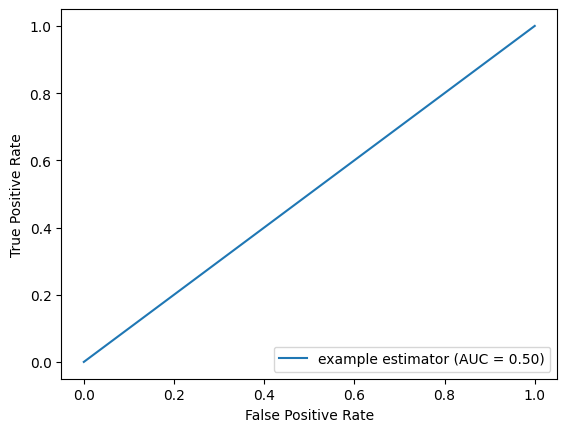

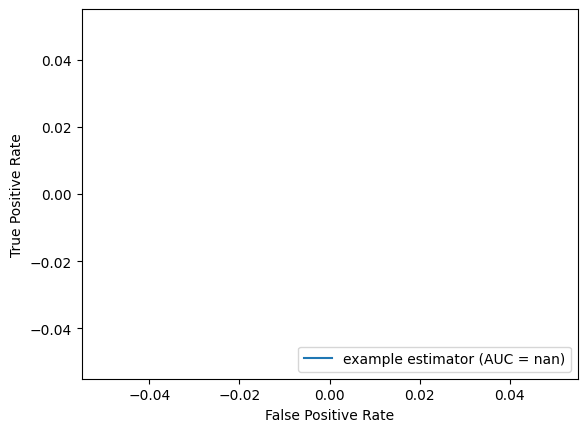

In [35]:
clastering_classification_result(clastinator1.predict(eabow_vectors_norm), df['spam'].to_numpy())


In [36]:
rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), adjusted_rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), fowlkes_mallows_score(df['spam'], clastinator1.predict(eabow_vectors_norm))


(0.7677778460732001, 0.0, 0.8762293341775315)

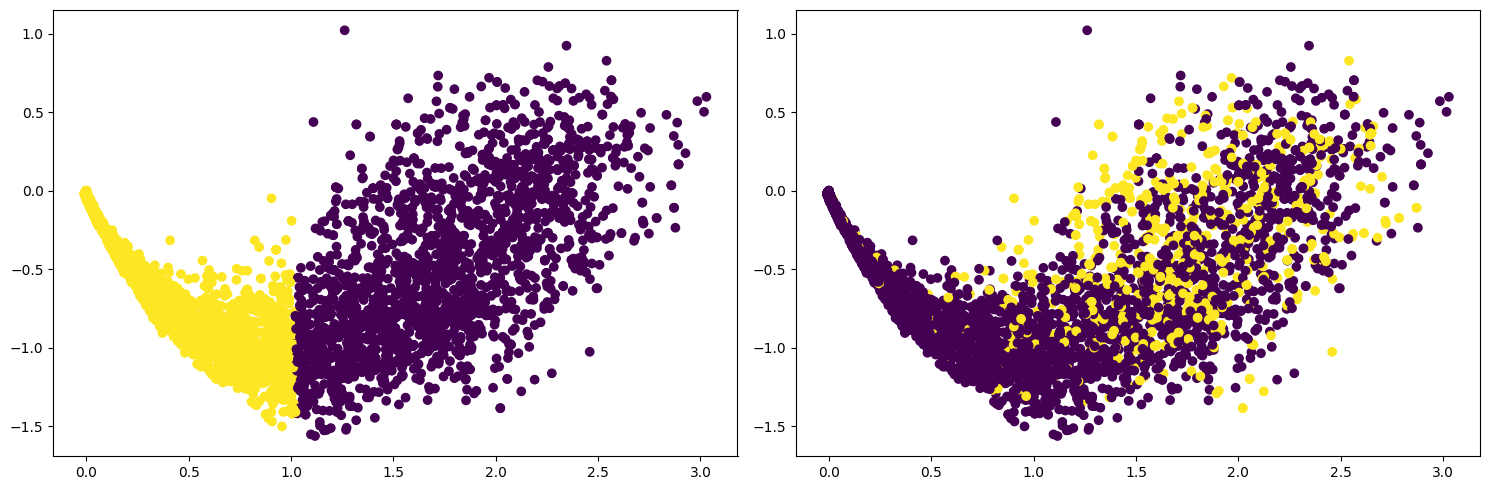

In [24]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:, 0], x2[:, 1], c=clastinator2.predict(x2))
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:, 0], x2[:, 1], c=df['spam'].to_numpy())



Accuracy
0.27207465900933236
0.7279253409906676
Confusion matrix
[[1407  638]
 [3418  109]]
[[3418  109]
 [1407  638]]
Precision, Recall, F
               precision    recall  f1-score   support

           0       0.29      0.69      0.41      2045
           1       0.15      0.03      0.05      3527

    accuracy                           0.27      5572
   macro avg       0.22      0.36      0.23      5572
weighted avg       0.20      0.27      0.18      5572

Precision, Recall, F
               precision    recall  f1-score   support

           0       0.71      0.97      0.82      3527
           1       0.85      0.31      0.46      2045

    accuracy                           0.73      5572
   macro avg       0.78      0.64      0.64      5572
weighted avg       0.76      0.73      0.69      5572



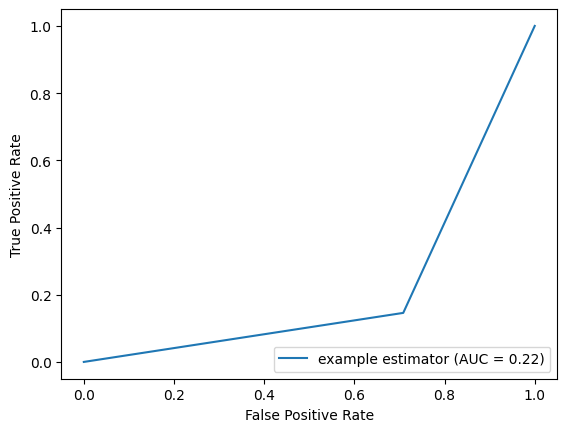

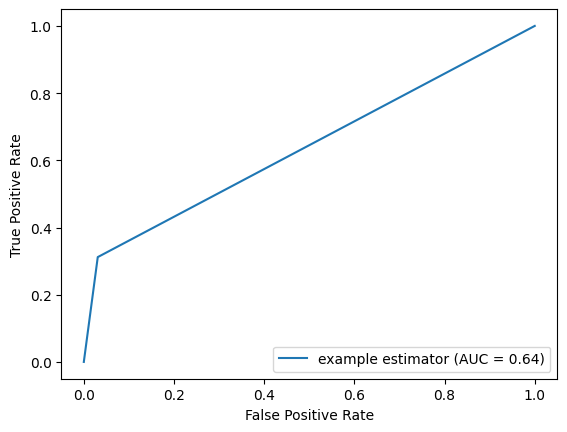

In [37]:
clastering_classification_result(clastinator2.predict(x2), df['spam'].to_numpy())


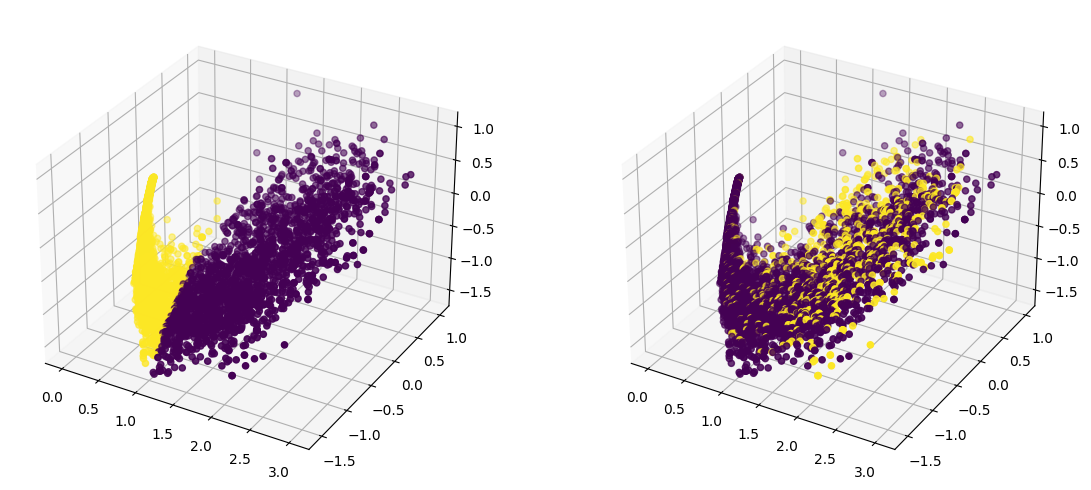

In [25]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=clastinator3.predict(x3))
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'].to_numpy())


Accuracy
0.2770997846374731
0.7229002153625269
Confusion matrix
[[1439  642]
 [3386  105]]
[[3386  105]
 [1439  642]]
Precision, Recall, F
               precision    recall  f1-score   support

           0       0.30      0.69      0.42      2081
           1       0.14      0.03      0.05      3491

    accuracy                           0.28      5572
   macro avg       0.22      0.36      0.23      5572
weighted avg       0.20      0.28      0.19      5572

Precision, Recall, F
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      3491
           1       0.86      0.31      0.45      2081

    accuracy                           0.72      5572
   macro avg       0.78      0.64      0.63      5572
weighted avg       0.76      0.72      0.68      5572



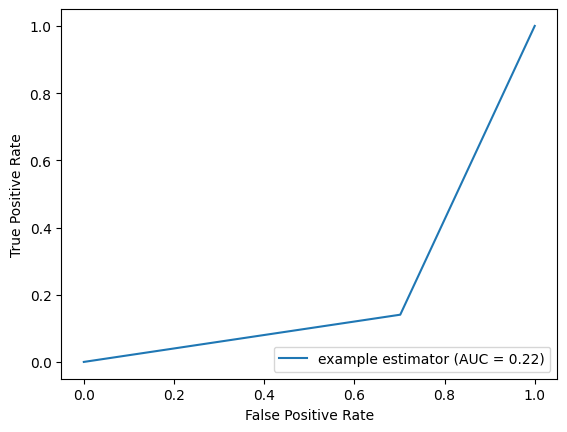

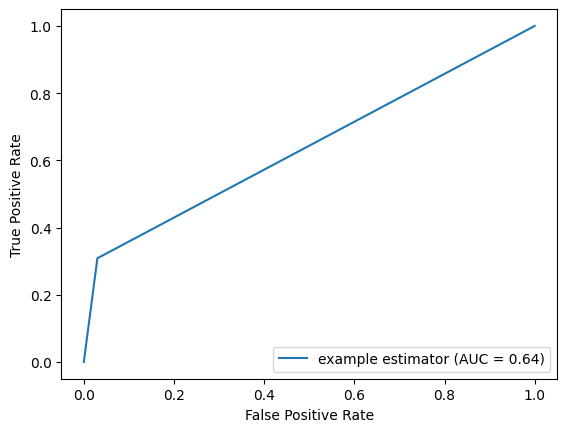

In [38]:
clastering_classification_result(clastinator3.predict(x3), df['spam'].to_numpy())


# BagOfWords

In [27]:
BoW = BagOfWords(bag=big_bag)
vector = df['message'].map(lambda text: BoW.vectorize(text))


[0] go [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[0] jurong [1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[2. 0. 0. ... 0. 0. 0.]
[0] point [2. 0. 0. ... 0. 0. 0.]
[2. 0. 0. ... 0. 0. 0.]
[3. 0. 0. ... 0. 0. 0.]
[0] crazy [3. 0. 0. ... 0. 0. 0.]
[3. 0. 0. ... 0. 0. 0.]
[4. 0. 0. ... 0. 0. 0.]
[0] available [4. 0. 0. ... 0. 0. 0.]
[4. 0. 0. ... 0. 0. 0.]
[5. 0. 0. ... 0. 0. 0.]
[0] bugis [5. 0. 0. ... 0. 0. 0.]
[5. 0. 0. ... 0. 0. 0.]
[6. 0. 0. ... 0. 0. 0.]
[0] n [6. 0. 0. ... 0. 0. 0.]
[6. 0. 0. ... 0. 0. 0.]
[7. 0. 0. ... 0. 0. 0.]
[0] great [7. 0. 0. ... 0. 0. 0.]
[7. 0. 0. ... 0. 0. 0.]
[8. 0. 0. ... 0. 0. 0.]
[0] world [8. 0. 0. ... 0. 0. 0.]
[8. 0. 0. ... 0. 0. 0.]
[9. 0. 0. ... 0. 0. 0.]
[0] la [9. 0. 0. ... 0. 0. 0.]
[9. 0. 0. ... 0. 0. 0.]
[10.  0.  0. ...  0.  0.  0.]
[0] e [10.  0.  0. ...  0.  0.  0.]
[10.  0.  0. ...  0.  0.  0.]
[11.  0.  0. ...  0.  0.  0.]
[0] buffet [11.  0.  0. ...  0.  0.  0.]
[11.  0.  0. ...  0.  0.  0.]
[12.  0.  0.

In [ ]:
eabow_vectors = np.append(vectors[0].reshape(1, vectors[0].shape[0]), np.ones([1, max_line - vectors[0].shape[0]]))
eabow_vectors = eabow_vectors.reshape(1, eabow_vectors.shape[0])
for vector in vectors[1:]:
    # print(vector.shape, np.append(vector, - np.ones(1, max_line - vector.shape[0])).shape, vector.tolist())
    # print(eabow_vectors.shape, eabow_vectors.tolist())
    # print(np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]])).shape)
    v = np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]]))
    eabow_vectors = np.append(eabow_vectors, v.reshape(1, v.shape[0]), axis=0)
eabow_vectors


array([[ 3.750e+03,  4.646e+03,  6.378e+03, ...,  1.000e+00,  1.000e+00,
         1.000e+00],
       [ 5.942e+03,  4.844e+03,  4.614e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.541e+03,  3.125e+03,  4.150e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 6.304e+03,  5.518e+03,  7.546e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.908e+03,  1.626e+03,  9.640e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.995e+03,  8.467e+03,  5.639e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [ ]:
eabow_vectors_norm = MinMaxScaler().fit_transform(X = eabow_vectors)
eabow_vectors_norm


array([[3.97815251e-01, 4.92788971e-01, 6.76242977e-01, ...,
        3.93700787e-04, 2.46366100e-04, 4.11522634e-04],
       [6.30289532e-01, 5.13785790e-01, 4.89239902e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.75649592e-01, 3.31495228e-01, 4.41004983e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.68681727e-01, 5.85259809e-01, 8.00063606e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.14572065e-01, 1.72534464e-01, 1.02300435e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.41966274e-01, 8.97985154e-01, 5.97900986e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x2 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 2)
x3 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 3)


In [ ]:
def random_center(x, k):
    return np.array([choice(x) for _ in range(k)])


def standart_mass_center_searcher(a):
    return sum(a)/a.shape[0]


In [ ]:
st1 = random_center(eabow_vectors, 2)
st2 = random_center(x2, 2)
st3 = random_center(x3, 2)


In [ ]:
cl1 = KMeanClastinatorTrain(centers_of_mass=st1,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl2 = KMeanClastinatorTrain(centers_of_mass=st2,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl3 = KMeanClastinatorTrain(centers_of_mass=st3,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
clastinator2 = cl2.train(x2)
clastinator1 = cl1.train(eabow_vectors_norm)
clastinator3 = cl3.train(x3)


In [32]:
rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), adjusted_rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), fowlkes_mallows_score(df['spam'], clastinator1.predict(eabow_vectors_norm))

(0.7677778460732001, 0.0, 0.8762293341775315)

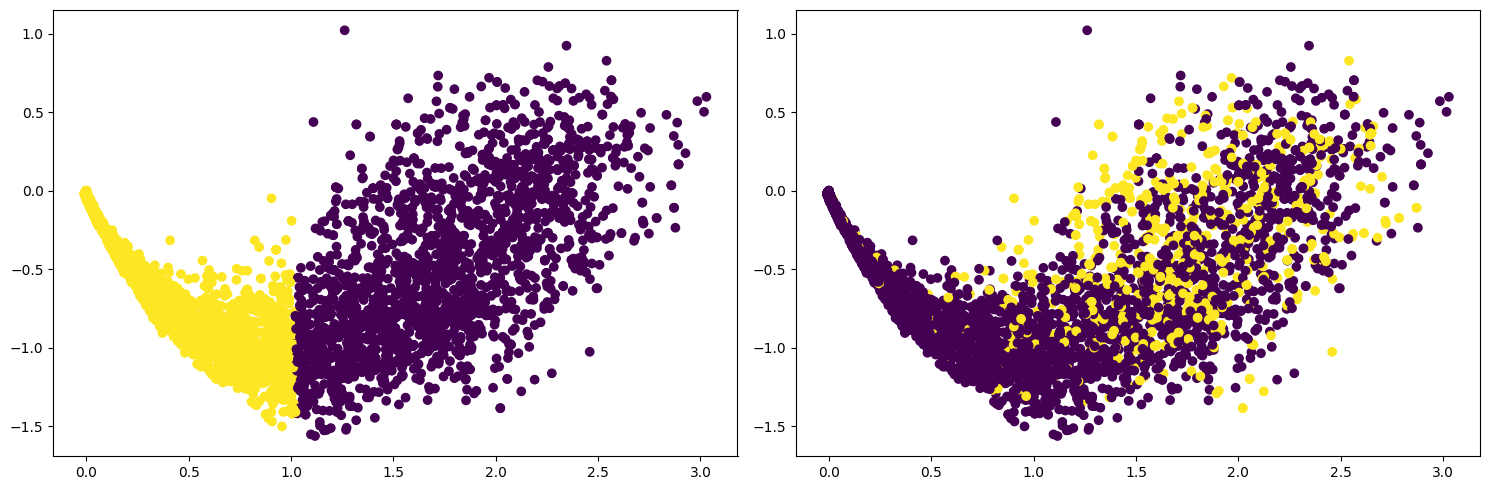

In [ ]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:, 0], x2[:, 1], c=clastinator2.predict(x2))
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:, 0], x2[:, 1], c=df['spam'].to_numpy())



In [31]:
rand_score(df['spam'], clastinator2.predict(x2)), adjusted_rand_score(df['spam'], clastinator2.predict(x2)), fowlkes_mallows_score(df['spam'], clastinator2.predict(x2))

(0.6038288217763949, 0.17653334235990487, 0.7073188995709071)

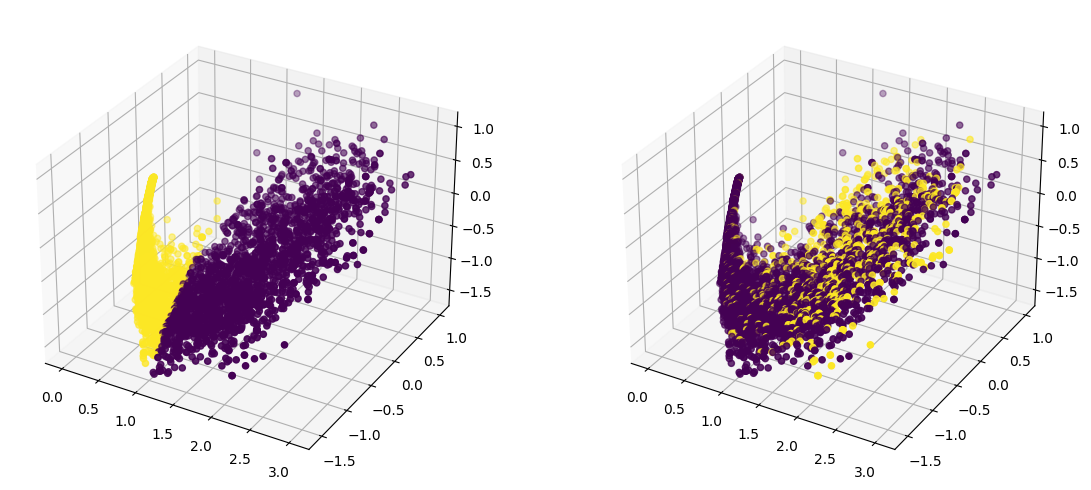

In [ ]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=clastinator3.predict(x3))
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'].to_numpy())


In [29]:
rand_score(df['spam'], clastinator3.predict(x3)), adjusted_rand_score(df['spam'], clastinator3.predict(x3)), fowlkes_mallows_score(df['spam'], clastinator3.predict(x3))

(0.5992970983594538, 0.17021194267111, 0.7033756153586415)

In [ ]:
eabow_vectors = np.append(vectors[0].reshape(1, vectors[0].shape[0]), np.ones([1, max_line - vectors[0].shape[0]]))
eabow_vectors = eabow_vectors.reshape(1, eabow_vectors.shape[0])
for vector in vectors[1:]:
    # print(vector.shape, np.append(vector, - np.ones(1, max_line - vector.shape[0])).shape, vector.tolist())
    # print(eabow_vectors.shape, eabow_vectors.tolist())
    # print(np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]])).shape)
    v = np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]]))
    eabow_vectors = np.append(eabow_vectors, v.reshape(1, v.shape[0]), axis=0)
eabow_vectors


array([[ 3.750e+03,  4.646e+03,  6.378e+03, ...,  1.000e+00,  1.000e+00,
         1.000e+00],
       [ 5.942e+03,  4.844e+03,  4.614e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.541e+03,  3.125e+03,  4.150e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 6.304e+03,  5.518e+03,  7.546e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.908e+03,  1.626e+03,  9.640e+02, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.995e+03,  8.467e+03,  5.639e+03, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [ ]:
eabow_vectors_norm = MinMaxScaler().fit_transform(X = eabow_vectors)
eabow_vectors_norm


array([[3.97815251e-01, 4.92788971e-01, 6.76242977e-01, ...,
        3.93700787e-04, 2.46366100e-04, 4.11522634e-04],
       [6.30289532e-01, 5.13785790e-01, 4.89239902e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.75649592e-01, 3.31495228e-01, 4.41004983e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.68681727e-01, 5.85259809e-01, 8.00063606e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.14572065e-01, 1.72534464e-01, 1.02300435e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.41966274e-01, 8.97985154e-01, 5.97900986e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x2 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 2)
x3 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 3)


In [ ]:
def random_center(x, k):
    return np.array([choice(x) for _ in range(k)])


def standart_mass_center_searcher(a):
    return sum(a)/a.shape[0]


In [ ]:
st1 = random_center(eabow_vectors, 2)
st2 = random_center(x2, 2)
st3 = random_center(x3, 2)


In [ ]:
cl1 = KMeanClastinatorTrain(centers_of_mass=st1,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl2 = KMeanClastinatorTrain(centers_of_mass=st2,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl3 = KMeanClastinatorTrain(centers_of_mass=st3,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
clastinator2 = cl2.train(x2)
clastinator1 = cl1.train(eabow_vectors_norm)
clastinator3 = cl3.train(x3)


In [ ]:
x2[:, 1], x2[:, 0]


(array([-0.22709743, -1.04373157,  0.07101168, ..., -0.4515052 ,
        -0.40510665, -0.15920097]),
 array([1.45277435, 0.52162862, 1.92750833, ..., 0.16265828, 1.62632434,
        0.04050732]))

In [ ]:
rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), adjusted_rand_score(df['spam'], clastinator1.predict(eabow_vectors_norm)), fowlkes_mallows_score(df['spam'], clastinator1.predict(eabow_vectors_norm))

(0.7677778460732001, 0.0, 0.8762293341775315)

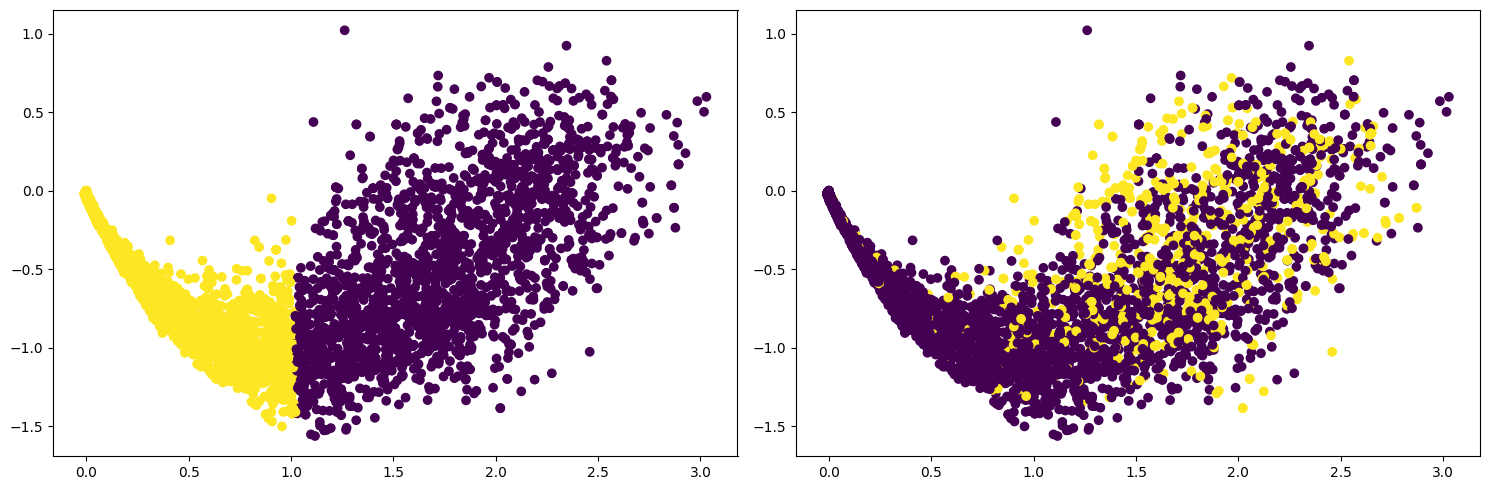

In [ ]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:, 0], x2[:, 1], c=clastinator2.predict(x2))
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:, 0], x2[:, 1], c=df['spam'].to_numpy())



In [ ]:
rand_score(df['spam'], clastinator2.predict(x2)), adjusted_rand_score(df['spam'], clastinator2.predict(x2)), fowlkes_mallows_score(df['spam'], clastinator2.predict(x2))

Accuracy
0.2770997846374731
0.7229002153625269
Confusion matrix
[[1439  642]
 [3386  105]]
[[3386  105]
 [1439  642]]
Precision, Recall, F
               precision    recall  f1-score   support

           0       0.30      0.69      0.42      2081
           1       0.14      0.03      0.05      3491

    accuracy                           0.28      5572
   macro avg       0.22      0.36      0.23      5572
weighted avg       0.20      0.28      0.19      5572

Precision, Recall, F
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      3491
           1       0.86      0.31      0.45      2081

    accuracy                           0.72      5572
   macro avg       0.78      0.64      0.63      5572
weighted avg       0.76      0.72      0.68      5572



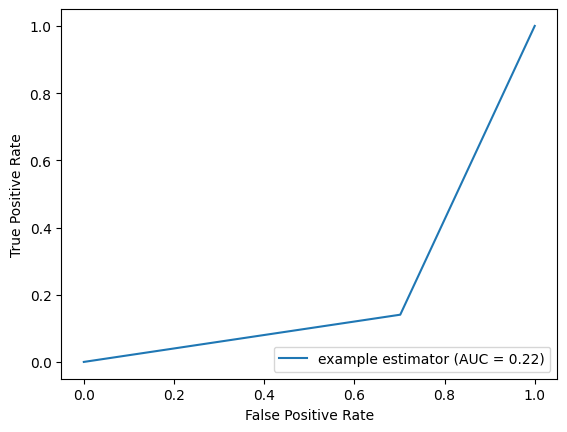

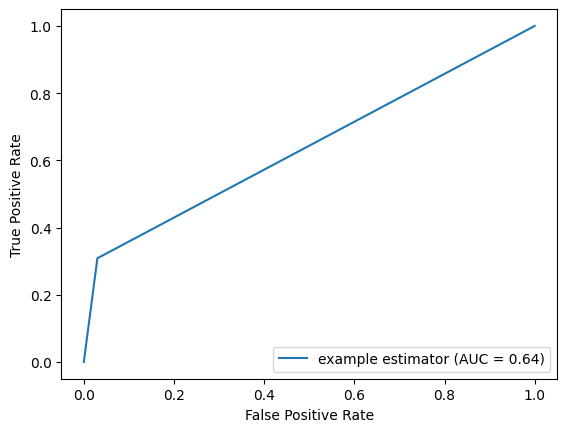

In [40]:
clastering_classification_result(clastinator3.predict(x3), df['spam'].to_numpy())


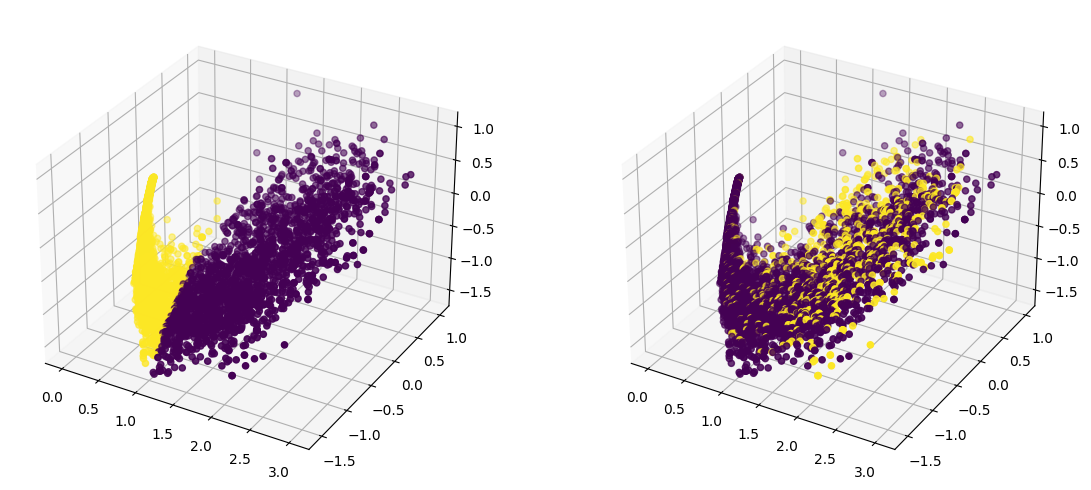

In [ ]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=clastinator3.predict(x3))
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'].to_numpy())


Accuracy
0.2770997846374731
0.7229002153625269
Confusion matrix
[[1439  642]
 [3386  105]]
[[3386  105]
 [1439  642]]
Precision, Recall, F
               precision    recall  f1-score   support

           0       0.30      0.69      0.42      2081
           1       0.14      0.03      0.05      3491

    accuracy                           0.28      5572
   macro avg       0.22      0.36      0.23      5572
weighted avg       0.20      0.28      0.19      5572

Precision, Recall, F
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      3491
           1       0.86      0.31      0.45      2081

    accuracy                           0.72      5572
   macro avg       0.78      0.64      0.63      5572
weighted avg       0.76      0.72      0.68      5572



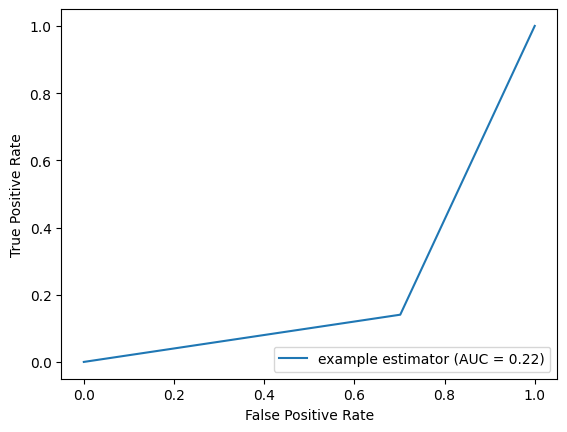

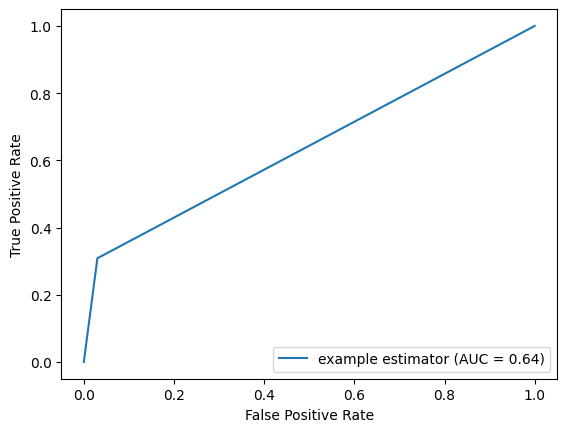

In [39]:
clastering_classification_result(clastinator3.predict(x3), df['spam'].to_numpy())


In [ ]:
rand_score(df['spam'], clastinator3.predict(x3)), adjusted_rand_score(df['spam'], clastinator3.predict(x3)), fowlkes_mallows_score(df['spam'], clastinator3.predict(x3))

(0.5992970983594538, 0.17021194267111, 0.7033756153586415)